In [1]:
from model_class import InpaintingVAE
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

In [2]:
model_path = 'models/model5.pt'

In [3]:
model_info = torch.load(model_path,  map_location=torch.device('cpu'))

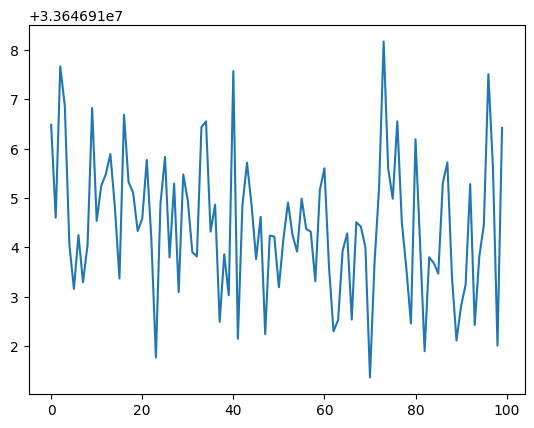

In [4]:
sns.lineplot(x=range(len(model_info['train_loss'])), y=model_info['train_loss'])
plt.show()

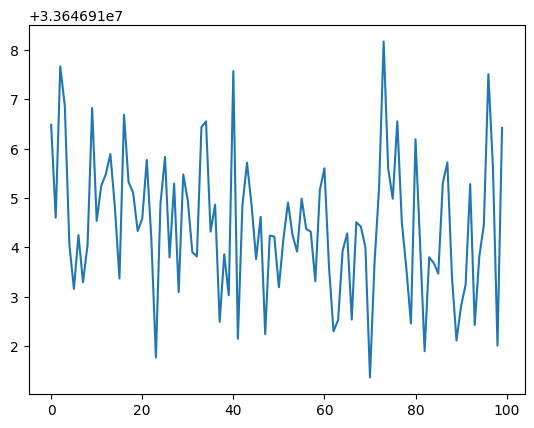

In [5]:
sns.lineplot(x=range(len(model_info['test_loss'])), y=model_info['train_loss'])
plt.show()

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [7]:
model_instance = InpaintingVAE(3, latent_dim=model_info['latent_size'], device='cpu')
model_instance.load_state_dict(model_info['model_state_dict'])

<All keys matched successfully>

In [8]:
model_instance.eval()
tr = transforms.Compose(
        [
            transforms.Resize((256, 256)),
            transforms.ToTensor()
        ],
    )

In [13]:
img = Image.open('data/demo_test/000005.png')
img = tr(img)

In [14]:
with torch.no_grad():
    retrieved_img = model_instance(img.unsqueeze(0))

In [15]:
test = retrieved_img[0].squeeze(0).permute(1,2,0).numpy()

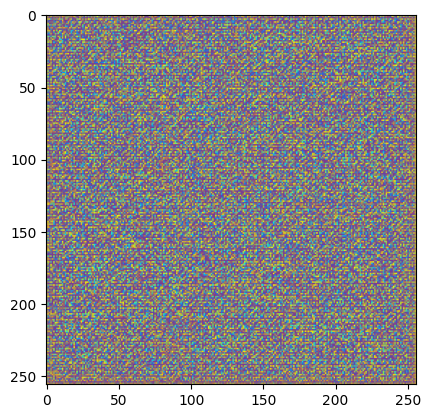

In [16]:
plt.imshow(test)
plt.show()